<ipython-input-2-e9cf2e852e03>:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['boh'] = filtered_df['age'].apply(assign_value_boh)


        model  test_mileage   age
0       PRIUS      227219.0  14.0
1       PRIUS      136552.0   9.0
2       PRIUS      129847.0   4.0
3       PRIUS      123133.0   6.0
4       PRIUS      129848.0   4.0
...       ...           ...   ...
947910  YARIS       31709.0   6.0
947912  AURIS      128000.0  11.0
947915   NIRO       91222.0   4.0
947916  AURIS      128002.0  11.0
947917     CT       60616.0   9.0

[570859 rows x 3 columns]


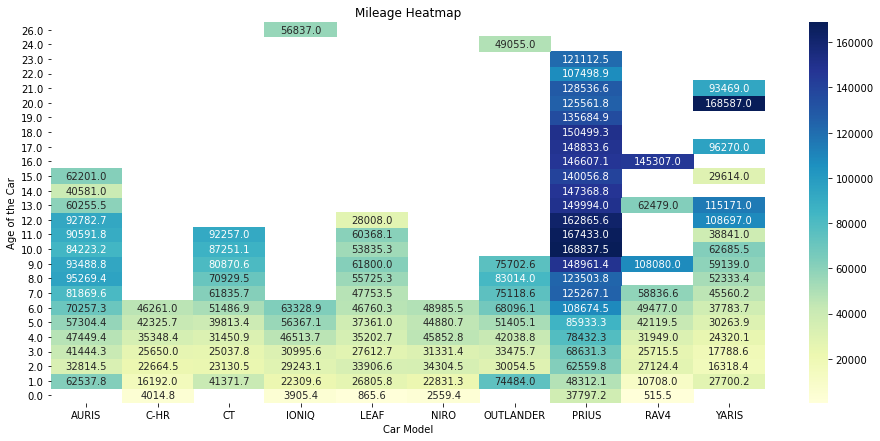

In [2]:

######### 2_2 Heatmap of the average age and mileage by EV model #########

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# # Manually replace the file path
csv_url = 'C:/Users/samar/Downloads/dft_test_result_2022/test_result.csv'
df = pd.read_csv(csv_url, delimiter = '|', error_bad_lines=False)
df = df[df['fuel_type'].isin(['EL', 'Electric', 'HY' , 'Hybrid Electric (Clean)'])]

# # Manually change the file path
# file_path = r'C:\Users\varun\OneDrive - Maynooth University\0_BCP\New Files\test vehicle.csv'
# df = pd.read_csv(file_path)

# calculating age
df['present'] = df['test_date'].str[-4:]
df['present'] = pd.to_numeric(df['present'], errors='coerce')
df['start'] = df['first_use_date'].str[-4:]
df['start'] = pd.to_numeric(df['start'], errors='coerce')
df['age'] = df['present'] - df['start']
# Define a function to check if the value is less than 8 and return 1, otherwise 0
def assign_value_less_80(x):
    return 1 if x > 8 else 0
df['boh_below_80'] = df['age'].apply(assign_value_less_80)
def assign_value_80_90(x):
    return 1 if 5 <= x <= 8 else 0
df['boh_80-90'] = df['age'].apply(assign_value_80_90)
def assign_value_above_90(x):
    return 1 if x < 5 else 0
df['boh_above_90'] = df['age'].apply(assign_value_above_90)
# Calculate the counts of each string in the column
string_counts = df['model'].value_counts()
df['model_count'] = df['model'].map(string_counts)
ma_count = df['make'].value_counts()
df['make_count'] = df['make'].map(ma_count)

# Manually enter top 10 models as it is mentioned in the data
top_ten_models = ['PRIUS', 'YARIS', 'AURIS', 'OUTLANDER', 'C-HR', 'LEAF', 'CT', 'RAV4', 'IONIQ', 'NIRO']

# Filter the DataFrame to include only rows with 'column_name' matching the strings in 'strings_to_filter'
filtered_df = df[df['model'].isin(top_ten_models)]

############################################################################
######### 2_2 Heatmap of the average age and mileage by EV model #########

def assign_value_boh(x):
    if x > 8:
        return 3
    elif 5 <= x <= 8:
        return 2
    else:
        return 1

# Apply the function to create the 'boh' column
filtered_df['boh'] = filtered_df['age'].apply(assign_value_boh)

heat_df = filtered_df[['model', 'test_mileage', 'age']]
print(heat_df)

# Pivot the DataFrame to create a table for heatmap
pivot_df = heat_df.pivot_table(index='age', columns='model', values='test_mileage', aggfunc='mean')

# Create the heatmap
plt.figure(figsize=(16, 7))  # Set the size of the figure (adjust width and height as needed)
sns.heatmap(pivot_df, annot=True, cmap='YlGnBu', fmt='0.1f')  # Use format code '0.1f' for floating-point numbers with one decimal place

# Add labels and title
plt.xlabel('Car Model')
plt.ylabel('Age of the Car')
plt.title('Mileage Heatmap')

# Invert y-axis
plt.gca().invert_yaxis()
# plt.ylim(15, 0)
# Show the plot
plt.show()
############################################################################
